### **SHAP (SHapley Additive exPlanations)**
- **Expected value / base value** = `The average model output (prediction) over the training dataset before seeing any specific input features.`

- **SHAP values** = `The contribution (positive or negative) of each feature toward pushing the prediction away from the base value.`

- **Predicted value** = `The final model output for that specific input instance`

***

`Predicted Value  =  Base Value  +  i=1∑n​SHAP Valuei​`

In [72]:
import pandas as pd
import numpy as np

***Data preparation***

In [73]:
data = pd.read_csv("reg_shap_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    int64  
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [74]:
data.dropna(inplace=True)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
5,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(data.loc[:, 'CRIM':'LSTAT'], data['MEDV'], test_size=0.2, random_state=42)

In [77]:
Y_train

390    23.2
22     14.5
326    22.2
336    18.5
60     16.0
       ... 
110    22.8
274    32.0
352    30.1
439    10.5
106    20.4
Name: MEDV, Length: 400, dtype: float64

In [78]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
390,5.29305,0.0,18.10,0,0.700,6.051,82.5,2.1678,24,666,20.2,378.38,18.76
22,0.98843,0.0,8.14,0,0.538,5.813,100.0,4.0952,4,307,21.0,394.54,19.88
326,0.24103,0.0,7.38,0,0.493,6.083,43.7,5.4159,5,287,19.6,396.90,12.79
336,0.03041,0.0,5.19,0,0.515,5.895,59.6,5.6150,5,224,20.2,394.81,10.56
60,0.17171,25.0,5.13,0,0.453,5.966,93.4,6.8185,8,284,19.7,378.08,14.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.10084,0.0,10.01,0,0.547,6.715,81.6,2.6775,6,432,17.8,395.59,10.16
274,0.09604,40.0,6.41,0,0.447,6.854,42.8,4.2673,4,254,17.6,396.90,2.98
352,0.01709,90.0,2.02,0,0.410,6.728,36.1,12.1265,5,187,17.0,384.46,4.50
439,22.05110,0.0,18.10,0,0.740,5.818,92.4,1.8662,24,666,20.2,391.45,22.11


In [79]:
X_test.shape, Y_test.shape 

((101, 13), (101,))

In [80]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
366,13.52220,0.0,18.10,0,0.631,3.863,100.0,1.5106,24,666,20.2,131.42,13.33
77,0.05646,0.0,12.83,0,0.437,6.232,53.7,5.0141,5,398,18.7,386.40,12.34
379,88.97620,0.0,18.10,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21
159,1.27346,0.0,19.58,1,0.605,6.250,92.6,1.7984,5,403,14.7,338.92,5.50
108,0.26363,0.0,8.56,0,0.520,6.229,91.2,2.5451,5,384,20.9,391.23,15.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,0.03932,0.0,3.41,0,0.489,6.405,73.9,3.0921,2,270,17.8,393.55,8.20
79,0.04113,25.0,4.86,0,0.426,6.727,33.5,5.4007,4,281,19.0,396.90,5.29
443,12.80230,0.0,18.10,0,0.740,5.854,96.6,1.8956,24,666,20.2,240.52,23.79
18,0.72580,0.0,8.14,0,0.538,5.727,69.5,3.7965,4,307,21.0,390.95,11.28


***regression***

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [82]:
reg = RandomForestRegressor()

In [83]:
model = reg.fit(X_train, Y_train)

In [84]:
model.feature_names_in_

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype=object)

***SHAP Explanation***

In [85]:
import shap

In [86]:
explainer = shap.Explainer(model, X_train)

In [87]:
dir(explainer)[:25]

['_TreeExplainer__dynamic_expected_value',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__']

In [88]:
dir(explainer)[25:]

['__setattr__',
 '__sizeof__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_shap_interactions_output',
 '_get_shap_output',
 '_instantiated_load',
 '_validate_inputs',
 'assert_additivity',
 'data',
 'data_missing',
 'expected_value',
 'explain_row',
 'feature_names',
 'feature_perturbation',
 'linearize_link',
 'link',
 'load',
 'masker',
 'model',
 'model_output',
 'output_names',
 'save',
 'shap_interaction_values',
 'shap_values',
 'supports_model_with_masker']

In [89]:
explainer.expected_value # base value 

np.float64(22.957629999999998)

In [91]:
explainer.feature_perturbation 
# interventional: uses conditional sampling (smarter, model-aware).
# independent: assumes features are independent (simpler, faster).

'interventional'

In [93]:
shap_values = explainer(X_test)

In [94]:
test_df = X_test.iloc[[0]]
test_df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
366,13.5222,0.0,18.1,0,0.631,3.863,100.0,1.5106,24,666,20.2,131.42,13.33


In [95]:
shap_values[0]

.values =
array([-3.67465001e-01,  1.29859597e-02,  9.91462190e-03, -2.91424036e-03,
        2.81319436e-01, -1.89743392e+00, -1.26016002e-01,  4.67686333e-01,
        3.40926081e-02, -2.19998958e-01, -2.42499364e-01, -7.80195448e-01,
       -3.21186614e+00])

.base_values =
np.float64(22.957629999999998)

.data =
array([1.35222e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01,
       3.86300e+00, 1.00000e+02, 1.51060e+00, 2.40000e+01, 6.66000e+02,
       2.02000e+01, 1.31420e+02, 1.33300e+01])

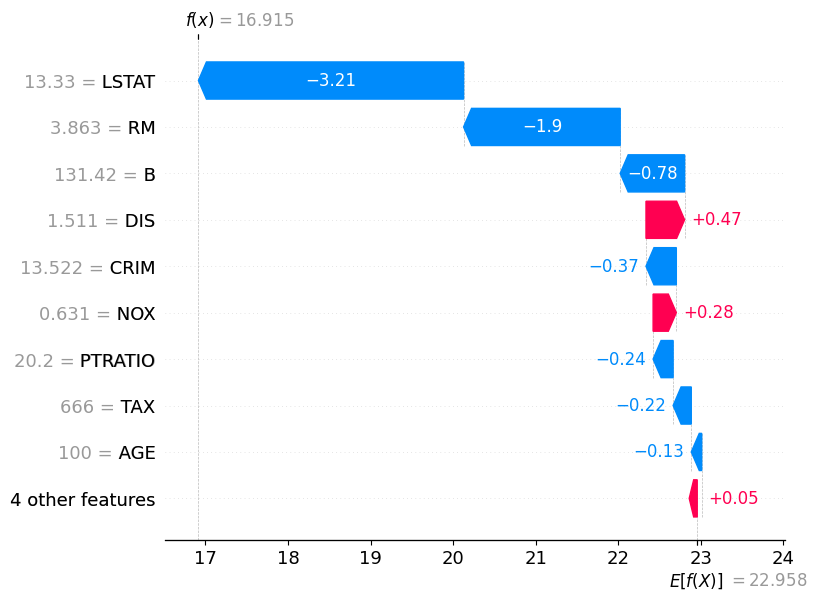

In [96]:
# waterfall visualisation
shap.plots.waterfall(shap_values[0])

In [97]:
predicted_value = shap_values[0].base_values + shap_values[0].values.sum()
predicted_value

np.float64(16.91523988469759)

In [98]:
model.predict(test_df)

array([16.915])

In [99]:
Y_test[0]

np.float64(21.6)